# Задание

Используя датасет "Пассажиры автобуса", создайте нейронную сеть для решения задачи классификации пассажиров на входящих и выходящих.

Добейтесь точности работы модели выше 90% на проверочной выборке

# Импорт и подготовка необходимых библиотек
В этом блоке выполняется импорт всех необходимых библиотек и модулей, которые будут использоваться для решения задачи классификации пассажиров автобуса на входящих и выходящих.

Для удобства и чистоты вывода предупреждения от библиотек подавляются с помощью warnings.filterwarnings("ignore").

Подключаются следующие библиотеки:

- numpy, random, os — для обработки данных, управления файлами и генерации случайных чисел.

- matplotlib.pyplot и PIL.Image — для визуализации изображений и графиков.

- gdown — для загрузки датасета из интернета.

- sklearn.model_selection.train_test_split — для разделения данных на обучающую, проверочную и тестовую выборки.

- tensorflow.keras.models.Sequential и соответствующие слои — для построения и обучения нейронной сети.

- tensorflow.keras.preprocessing.image — для загрузки и предобработки изображений.

- Adam из tensorflow.keras.optimizers — оптимизатор, применяемый для обучения модели.

In [ ]:
# Стандартная библиотека
import os  # Для работы с файлами
import random  # Для генерации случайных чисел
import warnings  # Подавление предупреждений
import zipfile  # работа с zip-архивами

warnings.filterwarnings("ignore")

# Сторонние библиотеки
import gdown  # Импортируем модуль для загрузки данных из интернета
import matplotlib.pyplot as plt  # Для отрисовки графиков
import numpy as np  # Для работы с массивами
from PIL import Image  # Методы для отрисовки изображений
from sklearn.model_selection import train_test_split  # Для разделения выборок

# TensorFlow / Keras
from tensorflow.keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D,
)  # Для создания слоев нейронной сети
from tensorflow.keras.models import Sequential  # Для создания сети
from tensorflow.keras.optimizers import Adam  # Оптимизатор для обучения модели
from tensorflow.keras.preprocessing import image  # Для работы с изображениями

# Загрузка и распаковка датасета
Код проверяет, есть ли в текущей директории файл с именем bus.zip.

- Если файл уже существует ("bus.zip" in os.listdir()), то ничего не делается (pass).

- Если файла нет, он скачивается по указанной ссылке с помощью gdown.download. Параметр quiet=True отключает вывод прогресса скачивания.

In [ ]:
# загрузка датасета
if "bus.zip" in os.listdir():
    pass
else:
    gdown.download(
        "https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip",
        None,
        quiet=True,
    )

При распаковке архива код:
- Проверяет наличие папки bus — если она есть, архив не распаковывается повторно.

- Если папки нет — распаковывает содержимое архива bus.zip в новую папку bus.

- Затем получает список подпапок или файлов в bus/ и выводит его на экран.

In [ ]:
# Распакуем архив
if "bus" in os.listdir(): # проверяем, есть ли папка bus в текущей директории
    pass
else: # если папки нет, то создаем ее и распаковываем архив
    with zipfile.ZipFile("bus.zip", "r") as zip_ref:
        zip_ref.extractall("bus")

# Папка с папками картинок
IMAGE_PATH = "bus/"

# Получение списка папок
print(os.listdir(IMAGE_PATH))

['Выходящий', 'Входящий']

# Определение классов и их количества
В этом блоке происходит получение списка классов из папок, находящихся в директории с изображениями. Для удобства и порядка используется сортировка списка классов в алфавитном порядке с помощью функции sorted().

Переменная CLASS_LIST содержит отсортированный список названий классов (папок), а CLASS_COUNT хранит общее количество классов.

Выводит количество классов и их метки для проверки корректности определения категорий, что важно для последующего кодирования меток и построения модели классификации.

In [ ]:
# Определение
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Количество классов: 2, метки классов: ['Входящий', 'Выходящий']


# Получение списка файлов в каждом классе
В этом блоке для каждого класса из списка классов (CLASS_LIST) происходит вывод списка файлов (изображений), которые находятся в соответствующей папке.

Используется цикл for для обхода всех классов и функция os.listdir() для получения содержимого каждой папки.

Такой вывод помогает убедиться, что данные загружены корректно, и увидеть, какие именно изображения представлены в каждой категории, что важно для последующего анализа и подготовки данных.

In [ ]:
# Получения списка файлов для каждого класса

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

Входящий : ['04694.jpg', '00994.jpg', '00821.jpg', '04495.jpg', '05657.jpg', '02371.jpg', '02797.jpg', '05736.jpg', '02635.jpg', '04629.jpg', '01199.jpg', '04440.jpg', '02661.jpg', '03491.jpg', '03335.jpg', '06222.jpg', '04939.jpg', '05996.jpg', '00149.jpg', '04818.jpg', '05273.jpg', '06458.jpg', '02908.jpg', '03265.jpg', '02546.jpg', '01768.jpg', '03344.jpg', '02422.jpg', '01207.jpg', '01123.jpg', '03258.jpg', '01511.jpg', '00926.jpg', '00790.jpg', '04099.jpg', '03736.jpg', '00852.jpg', '01448.jpg', '04358.jpg', '03824.jpg', '00658.jpg', '01185.jpg', '03062.jpg', '00880.jpg', '04215.jpg', '01804.jpg', '01012.jpg', '05352.jpg', '06341.jpg', '00559.jpg', '00993.jpg', '06255.jpg', '03607.jpg', '04038.jpg', '00008.jpg', '01498.jpg', '01376.jpg', '05385.jpg', '01926.jpg', '06022.jpg', '00473.jpg', '00573.jpg', '04760.jpg', '03392.jpg', '04068.jpg', '01365.jpg', '04623.jpg', '00988.jpg', '04443.jpg', '02578.jpg', '06384.jpg', '05891.jpg', '01661.jpg', '04172.jpg', '01651.jpg', '04166.jpg', 

#  Визуализация случайных изображений из каждого класса
В этом блоке создается полотно с подграфиками, расположенными в один ряд, количество которых равно числу классов (CLASS_COUNT).

Для каждого класса случайным образом выбирается одно изображение из соответствующей папки.

Каждое изображение отображается с заголовком, соответствующим метке класса, при этом оси координат отключены для более чистого визуального восприятия.

Такая визуализация позволяет наглядно ознакомиться с примерами изображений из каждого класса, что важно для понимания структуры данных перед их дальнейшей обработкой и обучением модели.

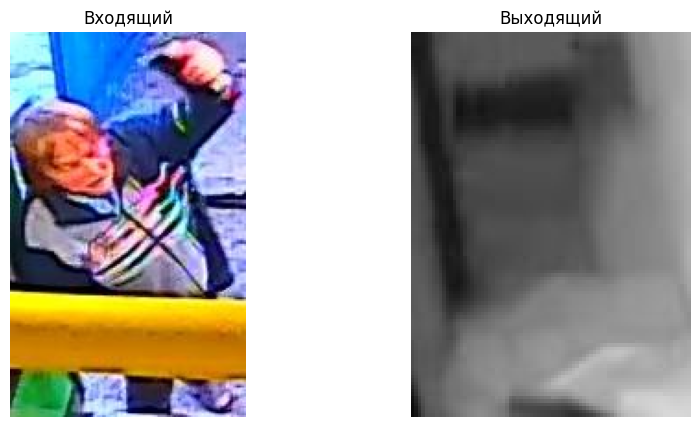

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):

    # Формирование пути к папке содержимого класса
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'

    # Выбор случайного фото из i-го класса
    img_path = car_path + random.choice(os.listdir(car_path))

    # Отображение фотографии (подробнее будет объяснено далее)
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

# Сбор путей к изображениям и меток классов
В этом блоке происходит последовательный обход всех классов в датасете по их индексам.

Для каждого класса формируется полный путь к папке с изображениями.

Извлекается список всех файлов изображений в данной папке, а также выводится количество файлов в классе — это помогает оценить баланс классов.

Далее, для каждого файла формируется полный путь и добавляется в общий список data_files.

Параллельно к списку меток data_labels добавляется индекс класса столько раз, сколько файлов содержит класс.

В итоге формируется полный набор данных в виде списков путей к изображениям и соответствующих меток классов для последующей подготовки и обучения модели.

In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print()
print('Общий размер базы для обучения:', len(data_labels))

Размер класса Входящий составляет 6485 фото
Размер класса Выходящий составляет 2596 фото

Общий размер базы для обучения: 9081


# Загрузка, нормализация и подготовка данных для обучения
Описание блока — Загрузка, нормализация и подготовка данных для обучения

В данном блоке происходит последовательная загрузка каждого изображения из списка путей data_files.

Изображения подгружаются с помощью функции image.load_img с указанием целевого размера (128x128 пикселей) для унификации размеров.

Далее каждое изображение преобразуется в numpy-массив с помощью image.img_to_array.

Для нормализации интенсивности пикселей значения делятся на 255.0, чтобы привести их к диапазону [0, 1].

Все подготовленные изображения собираются в список X, который затем преобразуется в единый numpy-массив для удобства обработки.

Метки классов, изначально в списке data_labels, также переводятся в numpy-массив y.

In [ ]:
from tensorflow.keras.utils import to_categorical

target_size = (128, 128)

X = []

# Преобразуем все изображения в numpy-массив нужного размера
for path in data_files:
    img = image.load_img(path, target_size=target_size)              # Загружаем изображение
    img_array = image.img_to_array(img)                              # Переводим в массив numpy
    img_array = img_array / 255.0                                    # Нормализация значений
    X.append(img_array)                                              # Добавляем к общему списку

# Преобразуем список изображений в массив numpy
X = np.array(X)

# Преобразуем метки в numpy-массив
y = np.array(data_labels)

print(f"Форма массива X: {X.shape}")
print(f"Форма массива y: {y.shape}")

Форма массива X: (9081, 128, 128, 3)
Форма массива y: (9081,)


# Разделение данных на обучающую и тестовую выборки
В этом блоке происходит разбиение подготовленных данных на две части: обучающую и тестовую выборки.

Для этого используется функция train_test_split из sklearn с параметром test_size=0.2, что означает выделение 20% данных для теста и 80% для обучения.

Параметр random_state=42 фиксирует случайное разбиение, чтобы обеспечить воспроизводимость результатов.

В конце выводится размерность массивов обучающих и тестовых данных, а также соответствующих меток, чтобы удостовериться в корректном разделении выборок перед дальнейшим этапом обучения модели.

In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Размер обучающей выборки: {X_train.shape}, метки: {y_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}, метки: {y_test.shape}')

Размер обучающей выборки: (7264, 128, 128, 3), метки: (7264,)
Размер тестовой выборки: (1817, 128, 128, 3), метки: (1817,)


# Cоздание и компиляция сверточной нейронной сети
В этом блоке создается последовательная модель сверточной нейронной сети (CNN) для классификации изображений.

Модель состоит из трех сверточных слоев с количеством фильтров 32, 64 и 128 соответственно, каждый с функцией активации ReLU.

После каждого сверточного слоя следует слой пакетной нормализации (BatchNormalization) для стабилизации и ускорения обучения.

Слои подвыборки (MaxPooling2D) уменьшают размерность признаков, помогая выделить наиболее важные характеристики.

После сверточных блоков данные преобразуются в одномерный вектор через слой Flatten.

Затем идет полносвязный слой с 256 нейронами и активацией ReLU, после которого применяется слой Dropout с вероятностью 0.5 для борьбы с переобучением.

Выходной слой имеет количество нейронов, равное числу классов, и использует функцию активации softmax для многоклассовой классификации.

Модель компилируется с оптимизатором Adam с низкой скоростью обучения (0.0001), функцией потерь категориальная кроссэнтропия и метрикой точности.

In [ ]:
# Преобразуем метки в one-hot
y_train_hot = to_categorical(y_train, num_classes=CLASS_COUNT)
y_test_hot = to_categorical(y_test, num_classes=CLASS_COUNT)

# Создание модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*target_size, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(CLASS_COUNT, activation='softmax')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Разделение обучающей выборки на тренировочную и проверочную
В этом блоке исходная обучающая выборка дополнительно разбивается на две части: собственно тренировочную и валидационную.

Для разделения используется функция train_test_split с параметром test_size=0.2, что означает выделение 20% данных из обучающего набора для проверки модели в процессе обучения.

random_state=42 фиксирует случайность, чтобы разделение было воспроизводимым.

В результате получаем четыре массива: X_train_final и y_train_final — данные и метки для обучения модели, X_val и y_val — данные и метки для валидации.

In [ ]:
# Разделение обучающей выборки на train и validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train_hot, test_size=0.2, random_state=42)

# Обучение модели нейронной сети
В этом блоке происходит обучение модели на тренировочной выборке X_train_final и метках y_train_final.

Обучение проводится в течение 30 эпох, при этом данные подаются пакетами (батчами) по 32 изображения.

Для контроля обучения используется проверочная выборка (X_val, y_val), которая позволяет отслеживать качество модели на данных, не участвующих в обучении, что помогает избежать переобучения.

Параметр verbose=1 включает подробный вывод процесса обучения с информацией о текущей эпохе, потерях и точности на тренировочных и валидационных данных.

In [ ]:
# Обучение модели
history = model.fit(
    X_train_final, y_train_final,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.7688 - loss: 0.8891 - val_accuracy: 0.7302 - val_loss: 0.5431
Epoch 2/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9373 - loss: 0.1605 - val_accuracy: 0.5162 - val_loss: 1.2133
Epoch 3/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9712 - loss: 0.0789 - val_accuracy: 0.9580 - val_loss: 0.1210
Epoch 4/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9832 - loss: 0.0439 - val_accuracy: 0.9828 - val_loss: 0.0562
Epoch 5/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9881 - loss: 0.0333 - val_accuracy: 0.9725 - val_loss: 0.0770
Epoch 6/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9884 - loss: 0.0340 - val_accuracy: 0.9814 - val_loss: 0.0514
Epoch 7/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9939 - loss: 0.0200 - val_accuracy: 0.9828 - val_loss: 0.0474
Epoch 8/30
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9955 - loss: 0.0163 - val_acc

# Оценка модели
В этом блоке проводится оценка качества обученной модели на тестовой выборке X_test.

Сначала модель предсказывает вероятности принадлежности каждого изображения к классам (y_pred_probs), затем эти вероятности преобразуются в метки классов с помощью np.argmax.

Истинные метки из тестового набора, представленные в формате one-hot, также конвертируются обратно в метки классов.

Для более сбалансированной оценки, особенно при возможном дисбалансе классов, вычисляется взвешенная F1-метрика, которая учитывает точность и полноту предсказаний.

In [ ]:
from sklearn.metrics import f1_score

# Предсказания модели на тестовой выборке
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)         # Получаем метки предсказаний
y_true = np.argmax(y_test_hot, axis=1)           # Преобразуем one-hot в метки

# Расчёт f1-метрики с учётом дисбаланса
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Точность модели на тестовой выборке: {f1:.4f}')

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
Точность модели на тестовой выборке: 0.9790


# Визуализация процесса обучения модели
В этом блоке строятся графики, отображающие динамику изменения точности и потерь модели на обучающей и валидационной выборках по эпохам.

Первый график показывает, как меняется точность (accuracy) модели: линии отражают результаты на обучающей и проверочной выборках, что помогает оценить, насколько хорошо модель учится и обобщается.

Второй график демонстрирует потери (loss), показывая снижение функции ошибки на обеих выборках, что является признаком улучшения качества модели.

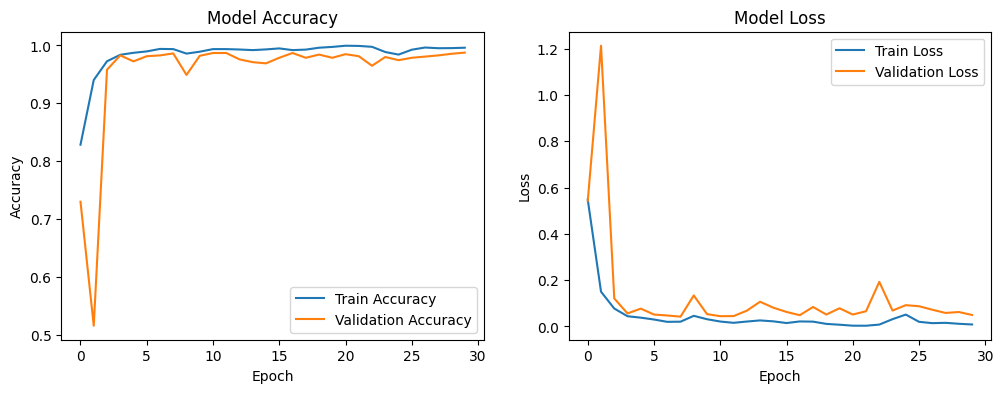

In [ ]:
# Визуализация обучения
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Выводы по заданию
По результатам обучения и тестирования модели удалось добиться высокой точности — 97.9% на тестовой выборке. Это свидетельствует о том, что нейронная сеть успешно справляется с задачей классификации пассажиров на входящих и выходящих.

Высокое значение метрики показывает, что модель хорошо обобщает знания и способна корректно распознавать объекты на новых данных, не участвовавших в обучении. При этом графики обучения подтверждают стабильное улучшение качества модели по мере эпох, без признаков переобучения.

Таким образом, поставленная задача с достижением точности выше 90% на проверочной выборке выполнена успешно.